/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_891600/3173616473.py:11: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr_test = PaddleOCR(use_angle_cls=True, lang='korean')
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete th

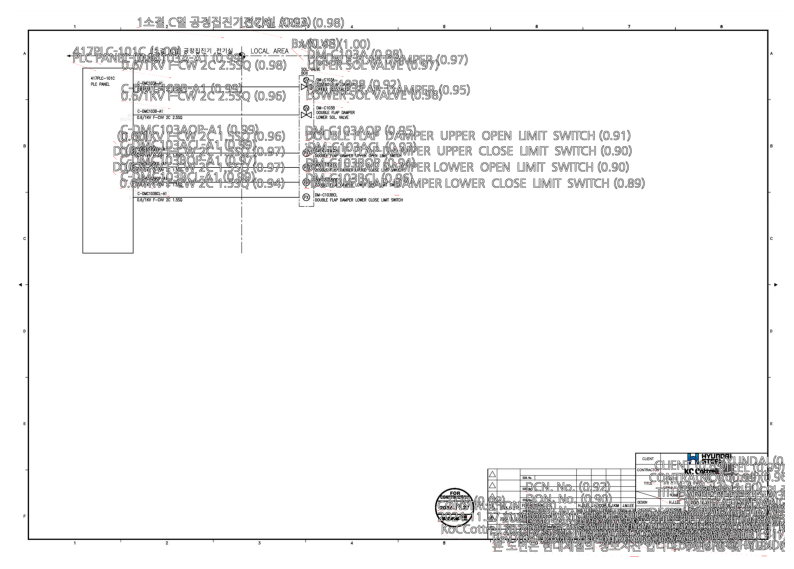

In [1]:
import cv2
import numpy as np
from paddleocr import PaddleOCR
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# 0. test image
image_path = './data/test05.JPG'

# 1. OCR 수행
ocr_test = PaddleOCR(use_angle_cls=True, lang='korean')
result = ocr_test.ocr(image_path)

# 2. 원본 이미지 로드 및 PIL 변환
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = Image.fromarray(img_rgb)
draw = ImageDraw.Draw(image)

# 3. 한글 폰트 설정 (리눅스용)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 4. 이미지 크기에 따라 폰트 크기 / 선 두께 조정
W, H = image.size
font_size = max(12, int(W * 0.015))   # 가로의 1.5%
thickness = max(1, int(W * 0.002))    # 가로의 0.2%
font = ImageFont.truetype(font_path, font_size)

# 5. OCR 결과 시각화
for bbox, text, score in zip(result[0]["rec_boxes"], result[0]["rec_texts"], result[0]["rec_scores"]):
    pts = np.array(bbox).reshape(-1, 2)
    pts = [tuple(p) for p in pts]

    # 바운딩 박스 (원하면 굵기도 thickness로)
    draw.polygon(pts, outline=(255, 0, 0), width=thickness)

    # 텍스트 좌표
    x, y = pts[0]
    label = f"{text} ({score:.2f})"

    # 빨강 외곽선 + 초록 텍스트
    outline_color = (0, 0, 0)
    text_color = (255, 255, 255)
    # 외곽선 효과 (4방향으로 그림자)
    for dx in [-1, 1]:
        for dy in [-1, 1]:
            draw.text((x + dx, y - font_size - 2 + dy), label, font=font, fill=outline_color)
    # 본 텍스트
    draw.text((x, y - font_size - 2), label, fill=text_color, font=font)

# 6. Jupyter에서 직접 출력 (image.show() 대신)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [2]:
# rec_texts = result[0]['rec_texts']
# # rec_scores = result[0]['rec_scores']
# texts = [t.strip() for t in rec_texts if t.strip()]

# for idx,text in enumerate(texts) :
#     print(f'{idx+1} : {text}')

In [3]:
# rec_texts = result[0]['rec_texts']
# rec_scores = result[0]['rec_scores']
# # result[0]['rec_texts']      # 인식된 텍스트 리스트
# # result[0]['rec_scores']     # 각 텍스트 신뢰도
# # result[0]['rec_polys']      # 각 텍스트 영역 좌표
# # result[0]['textline_orientation_angles']  # 라인 회전 정보

# # 신뢰도 낮은 순으로 정렬 (오름차순)
# low_conf_texts = sorted(
#     [(t, s) for t, s in zip(rec_texts, rec_scores) if t.strip()],
#     key=lambda x: x[1]  # 낮은 값이 먼저
# )

# for idx, (text, score) in enumerate(low_conf_texts, 1):
#     print(f"{idx:02d} | {score:.2f} | {text}")


In [4]:
# import matplotlib.pyplot as plt

# rec_scores = result[0]['rec_scores']

# plt.figure(figsize=(8,5))
# plt.hist(rec_scores, bins=20, color='skyblue', edgecolor='black')
# plt.title("OCR 신뢰도 분포", fontsize=14)
# plt.xlabel("신뢰도 (Confidence Score)")
# plt.ylabel("텍스트 개수 (Count)")
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.show()

# print(f"평균 신뢰도: {np.mean(rec_scores):.3f}")
# print(f"중앙값 신뢰도: {np.median(rec_scores):.3f}")
# print(f"최소 신뢰도: {np.min(rec_scores):.3f}")
# print(f"최대 신뢰도: {np.max(rec_scores):.3f}")


/tmp/ipykernel_891600/2284371839.py:22: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='korean')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.


Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('korean_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/korean_PP-OCRv5_mobile_rec`.
/tmp/ipykernel_891600/2284371839.py:23: DeprecationWarning: Please use `predict` instead.
  result = ocr.ocr(image_path)


총 텍스트 수: 102
 - 신뢰도 0.9 이상 (초록): 88
 - 0.8~0.9 (주황): 11
 - 0.8 미만 (빨강): 3


/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47280 (\N{HANGUL SYLLABLE ROE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py

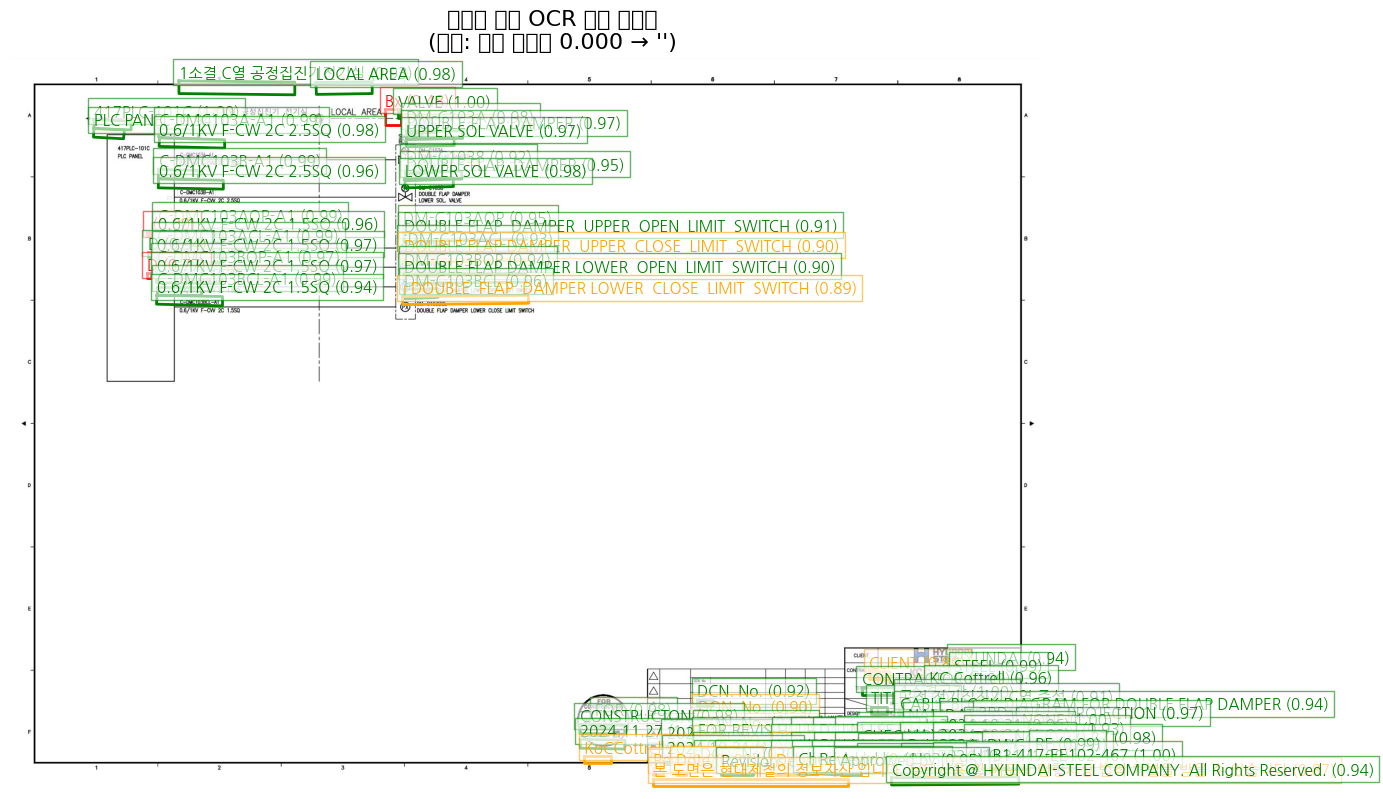

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR
import matplotlib.font_manager as fm

# -------------------------------
# 0. 기본 설정
# -------------------------------
image_path = "./data/test05.JPG"
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 이미지 로드
image_cv = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
orig_h, orig_w = image_rgb.shape[:2]

# -------------------------------
# 1. PaddleOCR 수행
# -------------------------------
ocr = PaddleOCR(use_angle_cls=True, lang='korean')
result = ocr.ocr(image_path)

rec_polys = result[0]['rec_polys']
rec_texts = result[0]['rec_texts']
rec_scores = result[0]['rec_scores']
rec_angles = result[0]['textline_orientation_angles']  # 라인 회전 정보

# -------------------------------
# 2. 좌표: 원본 크기 유지
# -------------------------------
# 좌표 그대로 사용 (원본 이미지 기준)
scaled_polys = [np.array(poly, dtype=np.float32) for poly in rec_polys]

# -------------------------------
# 3. 최소 신뢰도 텍스트 찾기
# -------------------------------
min_idx = int(np.argmin(rec_scores))
min_poly = scaled_polys[min_idx]
min_text = rec_texts[min_idx]
min_score = rec_scores[min_idx]

# -------------------------------
# 4. 시각화
# -------------------------------
plt.figure(figsize=(14, 14))
plt.imshow(image_rgb)
plt.axis("off")

for i, (poly, text, score) in enumerate(zip(scaled_polys, rec_texts, rec_scores)):
    # 색상: 신뢰도 구간별
    if score >= 0.9:
        color = 'green'
    elif score >= 0.8:
        color = 'orange'
    else:
        color = 'red'
        
    # 최소 신뢰도 강조
    if i == min_idx:
        color = 'red'
        linewidth = 3
    else:
        linewidth = 2
    
    # 폴리라인
    poly = np.array(poly)
    plt.plot(np.append(poly[:,0], poly[0,0]),
             np.append(poly[:,1], poly[0,1]),
             color=color, linewidth=linewidth)
    
    # 텍스트 표시
    plt.text(poly[0,0], poly[0,1]-10,
             f"{text} ({score:.2f})",
             color=color, fontsize=11, fontproperties=font_prop,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor=color))

# -------------------------------
# 5. 통계 출력
# -------------------------------
low_conf = sum(1 for s in rec_scores if s < 0.8)
mid_conf = sum(1 for s in rec_scores if 0.8 <= s < 0.9)
high_conf = sum(1 for s in rec_scores if s >= 0.9)

print(f"총 텍스트 수: {len(rec_scores)}")
print(f" - 신뢰도 0.9 이상 (초록): {high_conf}")
print(f" - 0.8~0.9 (주황): {mid_conf}")
print(f" - 0.8 미만 (빨강): {low_conf}")

plt.title(f"신뢰도 기반 OCR 결과 시각화\n(빨간: 최소 신뢰도 {min_score:.3f} → '{min_text}')", fontsize=16)
plt.show()


/tmp/ipykernel_891600/3723043194.py:21: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='korean')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dibaeck/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manua

총 텍스트 수: 188
선택된 최소 신뢰도 5개 텍스트:
 - DCNL No.  DCN- (0.769)
 - Dote (0.830)
 - DCN. No. (0.841)
 - DCN. No. DCN- (0.842)
 - Koc Cottrell (0.849)


/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/miniconda3/envs/proj_311/lib/python3.11/site-packages/IPython/core/pylabtools.

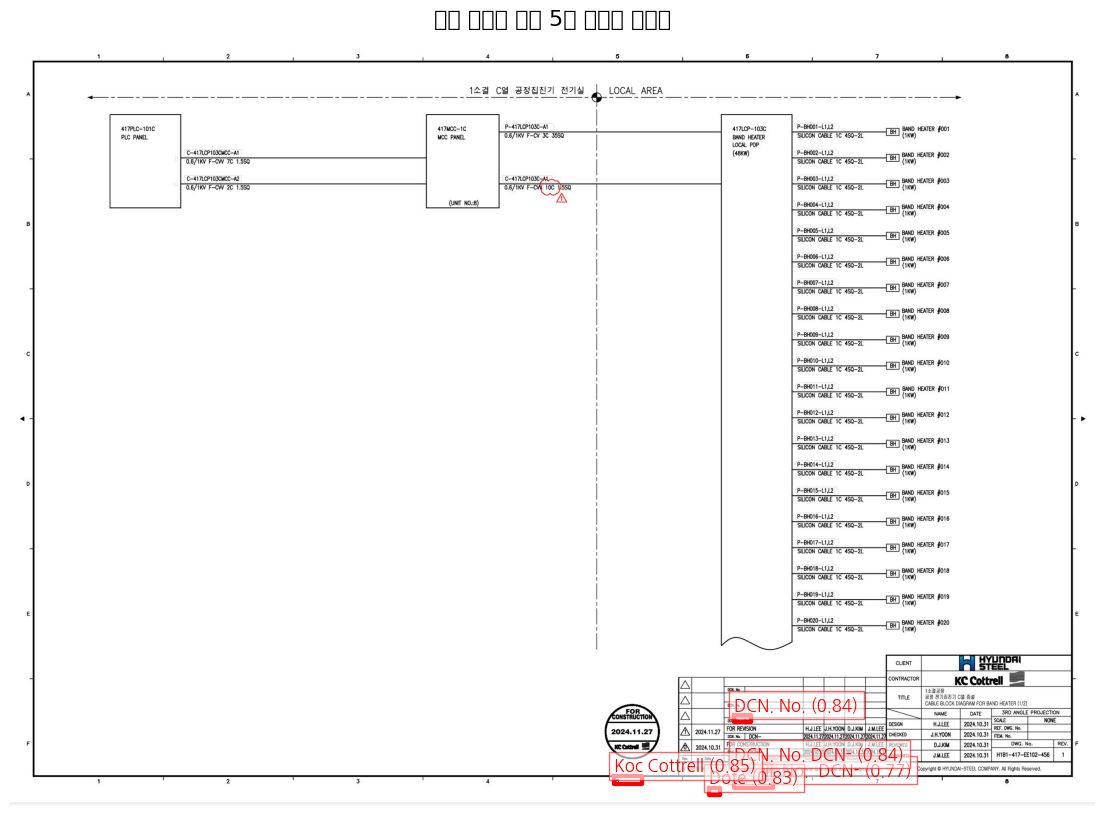

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR
import matplotlib.font_manager as fm

# -------------------------------
# 0. 기본 설정
# -------------------------------
image_path = "./data/test04.JPG"
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 이미지 로드
image_cv = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# -------------------------------
# 1. PaddleOCR 수행
# -------------------------------
ocr = PaddleOCR(use_angle_cls=True, lang='korean')
result = ocr.ocr(image_path)

rec_polys = result[0]['rec_polys']
rec_texts = result[0]['rec_texts']
rec_scores = result[0]['rec_scores']

# -------------------------------
# 2. 좌표: 원본 크기 유지
# -------------------------------
scaled_polys = [np.array(poly, dtype=np.float32) for poly in rec_polys]

# -------------------------------
# 3. 신뢰도 기준 최소 5개 선택
# -------------------------------
# 신뢰도 오름차순 정렬
sorted_indices = np.argsort(rec_scores)
top5_indices = sorted_indices[:5]  # 최소 5개

# -------------------------------
# 4. 시각화
# -------------------------------
plt.figure(figsize=(14, 14))
plt.imshow(image_rgb)
plt.axis("off")

for i in top5_indices:
    poly = scaled_polys[i]
    text = rec_texts[i]
    score = rec_scores[i]
    
    poly = np.array(poly)
    plt.plot(np.append(poly[:,0], poly[0,0]),
             np.append(poly[:,1], poly[0,1]),
             color='red', linewidth=3)
    
    plt.text(poly[0,0], poly[0,1]-10,
             f"{text} ({score:.2f})",
             color='red', fontsize=12, fontproperties=font_prop,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='red'))

# -------------------------------
# 5. 통계 출력
# -------------------------------
print(f"총 텍스트 수: {len(rec_scores)}")
print(f"선택된 최소 신뢰도 5개 텍스트:")
for i in top5_indices:
    print(f" - {rec_texts[i]} ({rec_scores[i]:.3f})")

plt.title("최소 신뢰도 상위 5개 텍스트 시각화", fontsize=16)
plt.show()
